# 10001st Prime
By listing the first six prime numbers: 2, 3, 5, 7, 11, and 13, we can see that the 6th prime is 13.

What is the 10 001st prime number?

## Solution One - Brute Force
The simplest way to solve this problem is to iterate through all numbers until we find the 10001st prime by trying to divide the number by every number smaller or equal to its squareroot.

In [1]:
from math import floor, sqrt

from utils.timing import timed


@timed(5)
def solution_one(n: int = 10001) -> int:
    """
    finds the nth prime number
    
    :param n: index of the prime number
    """
    index: int = 0
    prime: int = 1
        
    while index != n:
        is_prime: bool = True
        prime += 1
            
        for i in range(2, floor(sqrt(prime)) + 1):
            
            if not prime % i:
                is_prime = False
                break
                
        if is_prime:
            index += 1;
    
    return prime

answer, time = solution_one()
print(f'the answers if: {answer}')
print(f'that took: {time}s')

the answers if: 104743
that took: 0.11467728240022552s


### Solution One Discussion
Solution one is very efficient in terms of memory, but is has too many loops hindering its performance: first we need to iterate through a at least $n$ numbers to find the $n^\text{th}$ prime, and then, for each number, we need to check every number less than its squareroot.

## Solution Two - Using Previous Generated Primes
To avoid having to check if $n$ is divisible by every number unders its squareroot, we can store previously generated primes and and check if $n$ is divisible by them.

In [2]:
from math import floor, sqrt
from typing import List

from utils.timing import timed


@timed(5)
def solution_two(n: int = 10001) -> int:
    """
    finds the nth prime number
    
    :param n: index of the prime number
    """
    index: int = 0
    prime: int = 1
    primes: List[int] = []
        
    while index != n:
        is_prime: bool = True
        prime += 1
        upper_boud: int = floor(sqrt(prime))
        
        for i in primes:
            
            if not prime % i:
                is_prime = False
                break
                
            if i > upper_boud:
                break
                
        if is_prime:
            primes.append(prime)
            index += 1;
    
    return prime

answer, time = solution_two()
print(f'the answers if: {answer}')
print(f'that took: {time}s')

the answers if: 104743
that took: 0.05084918619941163s


### Solution Two Discussion
Solution two is a considerable upgrade from solution one. While it is less efficient in memory usage, it is considerably faster. While this might seem like a horizontal shift rather than an upgrade, due to the increasing prime scarcity, the memory usage does does not grow proportionally to $n$ but approximately to $\frac{n}{\ln{n}-1}$ (https://primes.utm.edu/howmany.html)

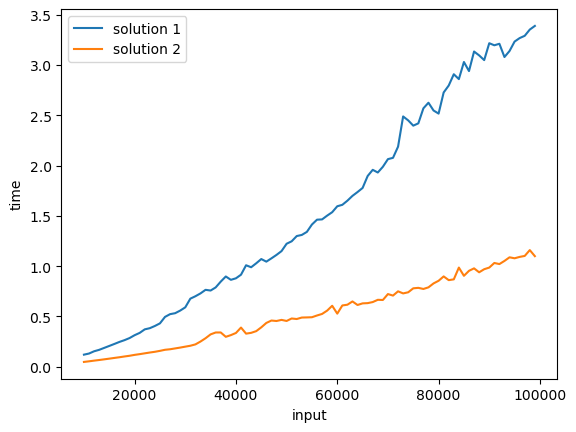

In [3]:
from utils.plotting import plot_range

params = tuple((i, ) for i in range(10000, 100000, 1000))
plot_range(params, (solution_one, solution_two))